In [2]:
import pandas as pd
import numpy as np
import gc
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", color_codes=True)
# pd.set_option('max_colwidth',500)

In [3]:
headers_by_student_network_record = ['id', 'logintime', 'logouttime', 'in_mb', 'out_mb', 'user_mac', 'user_os']
headers_by_student_info = ['id', 'sex', 'grade', 'school', 'province']
headers_by_course_schedule_info = ['id', 'name', 'teacher', 'classroom', 'start_class', 'stop_class', 'class_week', 'class_weekday', 'year', 'term']

In [3]:
by_student_network_record_data = pd.read_csv('by/by_student_network_record.csv', sep='\t', names=headers_by_student_network_record).drop(['user_mac', 'user_os'], axis=1)
# by_student_info_data = pd.read_csv('by/by_student_info.csv', sep='\t', names=headers_by_student_info)
# by_course_schedule_info_data = pd.read_csv('by/by_course_schedule_info.csv', sep='\t', names=headers_by_course_schedule_info)

In [4]:
by_student_network_record_data = pd.read_csv('new_network_student_info_data.csv')

In [5]:
by_student_network_record_data.head()

,Unnamed: 0,id,logintime,logouttime,in_mb,out_mb,sex,grade,school,province
0,0,8522acc840ae073db7627dc39f713450,2017-11-29 19:40:03,2017-11-29 23:10:27,1084.018,150.631,男,2017,信息与通信工程学院,辽宁省
1,1,8522acc840ae073db7627dc39f713450,2017-11-30 10:42:14,2017-11-30 11:29:57,9.972,0.837,男,2017,信息与通信工程学院,辽宁省
2,2,8522acc840ae073db7627dc39f713450,2017-11-30 21:26:47,2017-11-30 23:59:59,3.999,1.645,男,2017,信息与通信工程学院,辽宁省
3,3,8522acc840ae073db7627dc39f713450,2017-12-01 00:00:00,2017-12-01 00:00:00,0.000,0.000,男,2017,信息与通信工程学院,辽宁省
4,4,8522acc840ae073db7627dc39f713450,2017-11-30 20:42:15,2017-11-30 22:41:25,15.937,1.446,男,2017,信息与通信工程学院,辽宁省


In [6]:
by_student_network_record_data['id'].unique().shape

(7353,)

In [7]:
by_student_network_record_data['day'] = by_student_network_record_data['logintime'].str.split(expand=True)[0]

In [127]:
by_student_network_record_data['logintime'] = pd.to_datetime(by_student_network_record_data['logintime'])
by_student_network_record_data['logouttime'] = pd.to_datetime(by_student_network_record_data['logouttime'])

In [9]:
by_student_network_record_data['total_mb'] = by_student_network_record_data['in_mb'] + by_student_network_record_data['out_mb']

In [10]:
by_student_network_record_data['weekday'] = by_student_network_record_data['logintime'].dt.weekday

In [11]:
by_student_network_record_data['duration'] = by_student_network_record_data['logouttime'] - by_student_network_record_data['logintime']

In [12]:
by_student_network_record_data['duration_seconds'] = (by_student_network_record_data['duration'].dt.total_seconds()) / 3600.

In [13]:
by_student_network_record_data['logintime_seconds'] = (by_student_network_record_data['logintime'].dt.hour * 3600. + by_student_network_record_data['logintime'].dt.minute * 60 + by_student_network_record_data['logintime'].dt.second) / 3600.

In [14]:
by_student_network_record_data.shape

(811032, 16)

In [15]:
by_student_network_record_data = by_student_network_record_data.sort_values(by=['id', 'logintime']).reset_index()

In [16]:
by_student_network_record_data.head()

,index,Unnamed: 0,id,logintime,logouttime,in_mb,out_mb,sex,grade,school,province,day,total_mb,weekday,duration,duration_seconds,logintime_seconds
0,586085,5761082,000092f7ebf972fb64a91dc3b2a2aca1,2017-09-01 00:00:05,2017-09-01 09:32:34,123.723,9.771,男,2017,经济管理学院,贵州省,2017-09-01,133.494,4,09:32:29,9.541389,0.001389
1,586084,5761080,000092f7ebf972fb64a91dc3b2a2aca1,2017-09-01 09:47:40,2017-09-01 16:50:30,152.550,25.554,男,2017,经济管理学院,贵州省,2017-09-01,178.104,4,07:02:50,7.047222,9.794444
2,586079,5761075,000092f7ebf972fb64a91dc3b2a2aca1,2017-09-01 13:18:47,2017-09-01 13:57:12,583.680,21.452,男,2017,经济管理学院,贵州省,2017-09-01,605.132,4,00:38:25,0.640278,13.313056
3,586081,5761077,000092f7ebf972fb64a91dc3b2a2aca1,2017-09-01 18:32:17,2017-09-01 19:09:11,3.802,0.489,男,2017,经济管理学院,贵州省,2017-09-01,4.291,4,00:36:54,0.615000,18.538056
4,586080,5761076,000092f7ebf972fb64a91dc3b2a2aca1,2017-09-01 18:44:31,2017-09-01 18:53:00,0.937,0.289,男,2017,经济管理学院,贵州省,2017-09-01,1.226,4,00:08:29,0.141389,18.741944


In [17]:
pd.Timestamp(by_student_network_record_data['logouttime'][0].year, by_student_network_record_data['logouttime'][0].month, by_student_network_record_data['logouttime'][0].day, 23, 59, 59)

Timestamp('2017-09-01 23:59:59')

In [18]:
by_student_network_record_data['logouttime'][0].year

2017

In [19]:
by_student_network_record_data['logouttime'][0].time()

datetime.time(9, 32, 34)

In [20]:
for i in range(by_student_network_record_data.shape[0]):
    if(by_student_network_record_data['logintime'][i].day != by_student_network_record_data['logouttime'][i].day):
        by_student_network_record_data['logouttime'][i] = pd.Timestamp(by_student_network_record_data['logintime'][i].year, by_student_network_record_data['logintime'][i].month, by_student_network_record_data['logintime'][i].day, 23,59,59)
    if(i % 1000 == 0):
        print(i)

0


C:\software\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000
15

In [37]:
by_student_network_record_data.head()

,Unnamed: 0,index,Unnamed: 0.1,id,logintime,logouttime,in_mb,out_mb,sex,grade,school,province,day,total_mb,weekday,duration,duration_seconds,logintime_seconds
0,0,586085,5761082,000092f7ebf972fb64a91dc3b2a2aca1,2017-09-01 00:00:05,2017-09-01 09:32:34,123.723,9.771,男,2017,经济管理学院,贵州省,2017-09-01,133.494,4,0 days 09:32:29.000000000,9.541389,0.001389
1,1,586084,5761080,000092f7ebf972fb64a91dc3b2a2aca1,2017-09-01 09:47:40,2017-09-01 16:50:30,152.550,25.554,男,2017,经济管理学院,贵州省,2017-09-01,178.104,4,0 days 07:02:50.000000000,7.047222,9.794444
2,2,586079,5761075,000092f7ebf972fb64a91dc3b2a2aca1,2017-09-01 13:18:47,2017-09-01 13:57:12,583.680,21.452,男,2017,经济管理学院,贵州省,2017-09-01,605.132,4,0 days 00:38:25.000000000,0.640278,13.313056
3,3,586081,5761077,000092f7ebf972fb64a91dc3b2a2aca1,2017-09-01 18:32:17,2017-09-01 19:09:11,3.802,0.489,男,2017,经济管理学院,贵州省,2017-09-01,4.291,4,0 days 00:36:54.000000000,0.615000,18.538056
4,4,586080,5761076,000092f7ebf972fb64a91dc3b2a2aca1,2017-09-01 18:44:31,2017-09-01 18:53:00,0.937,0.289,男,2017,经济管理学院,贵州省,2017-09-01,1.226,4,0 days 00:08:29.000000000,0.141389,18.741944


In [24]:
by_student_network_record_data.to_csv('by_student_network_record_data_handle.csv')

In [3]:
# 提取特征
by_student_network_record_data = pd.read_csv('by_student_network_record_data_handle.csv')

In [7]:
by_student_network_record_data.head(10)

,Unnamed: 0,index,Unnamed: 0.1,id,logintime,logouttime,in_mb,out_mb,sex,grade,school,province,day,total_mb,weekday,duration,duration_seconds,logintime_seconds
0,0,586085,5761082,000092f7ebf972fb64a91dc3b2a2aca1,2017-09-01 00:00:05,2017-09-01 09:32:34,123.723,9.771,男,2017,经济管理学院,贵州省,2017-09-01,133.494,4,0 days 09:32:29.000000000,9.541389,0.001389
1,1,586084,5761080,000092f7ebf972fb64a91dc3b2a2aca1,2017-09-01 09:47:40,2017-09-01 16:50:30,152.550,25.554,男,2017,经济管理学院,贵州省,2017-09-01,178.104,4,0 days 07:02:50.000000000,7.047222,9.794444
2,2,586079,5761075,000092f7ebf972fb64a91dc3b2a2aca1,2017-09-01 13:18:47,2017-09-01 13:57:12,583.680,21.452,男,2017,经济管理学院,贵州省,2017-09-01,605.132,4,0 days 00:38:25.000000000,0.640278,13.313056
3,3,586081,5761077,000092f7ebf972fb64a91dc3b2a2aca1,2017-09-01 18:32:17,2017-09-01 19:09:11,3.802,0.489,男,2017,经济管理学院,贵州省,2017-09-01,4.291,4,0 days 00:36:54.000000000,0.615000,18.538056
4,4,586080,5761076,000092f7ebf972fb64a91dc3b2a2aca1,2017-09-01 18:44:31,2017-09-01 18:53:00,0.937,0.289,男,2017,经济管理学院,贵州省,2017-09-01,1.226,4,0 days 00:08:29.000000000,0.141389,18.741944
5,5,586083,5761079,000092f7ebf972fb64a91dc3b2a2aca1,2017-09-01 21:05:29,2017-09-01 21:10:38,0.248,0.221,男,2017,经济管理学院,贵州省,2017-09-01,0.469,4,0 days 00:05:09.000000000,0.085833,21.091389
6,6,586082,5761078,000092f7ebf972fb64a91dc3b2a2aca1,2017-09-01 21:15:06,2017-09-01 23:59:59,40.298,8.330,男,2017,经济管理学院,贵州省,2017-09-01,48.628,4,0 days 08:12:01.000000000,8.200278,21.251667
7,7,586086,5761084,000092f7ebf972fb64a91dc3b2a2aca1,2017-09-15 14:11:12,2017-09-15 14:30:57,21.194,1.501,男,2017,经济管理学院,贵州省,2017-09-15,22.695,4,0 days 00:19:45.000000000,0.329167,14.186667
8,8,586088,5761086,000092f7ebf972fb64a91dc3b2a2aca1,2017-09-15 21:05:32,2017-09-15 23:59:59,1137.911,75.002,男,2017,经济管理学院,贵州省,2017-09-15,1212.913,4,0 days 21:28:00.000000000,21.466667,21.092222
9,9,586087,5761085,000092f7ebf972fb64a91dc3b2a2aca1,2017-09-16 20:23:03,2017-09-16 23:59:59,1044.557,210.400,男,2017,经济管理学院,贵州省,2017-09-16,1254.957,5,0 days 16:47:35.000000000,16.793056,20.384167


In [18]:
by_student_network_record_data.groupby(['id','day'])['index'].count().reset_index().to_csv('network_count_by_day.csv')

In [47]:
# 提取一个新的表，为id，日，用于存放特征
feature_network_id_day = by_student_network_record_data.groupby(['id', 'day']).sum().reset_index().iloc[:, [0, 1]]

In [53]:
feature_network_id_day.shape

(374705, 2)

In [52]:
# 找出每日平均total_mb的25%与75%
temp = by_student_network_record_data.groupby(['id', 'day'])['total_mb'].sum().reset_index()

In [55]:
temp.describe()

,total_mb
count,374705.000000
mean,719.159117
std,1778.937686
min,0.000000
25%,50.569000
50%,185.097000
75%,609.271000
max,93294.817000


In [56]:
temp['f_total_mb_by_day_75%'] = 0
temp['f_total_mb_by_day_25%'] = 0

In [84]:
temp['f_total_mb_by_day_75%'] = temp['total_mb'] > 609.271000
temp['f_total_mb_by_day_25%'] = temp['total_mb'] < 50.569000

In [85]:
temp['f_total_mb_by_day_75%'] = temp['f_total_mb_by_day_75%'].astype('int')
temp['f_total_mb_by_day_25%'] = temp['f_total_mb_by_day_25%'].astype('int')

In [86]:
feature_network_id_day['f_total_mb_by_day_75%'] = temp['f_total_mb_by_day_75%']
feature_network_id_day['f_total_mb_by_day_25%'] = temp['f_total_mb_by_day_25%']

In [87]:
feature_network_id_day.head()

,id,day,f_total_mb_by_day_75%,f_total_mb_by_day_25%
0,000092f7ebf972fb64a91dc3b2a2aca1,2017-09-01,1,0
1,000092f7ebf972fb64a91dc3b2a2aca1,2017-09-15,1,0
2,000092f7ebf972fb64a91dc3b2a2aca1,2017-09-16,1,0
3,000092f7ebf972fb64a91dc3b2a2aca1,2017-09-18,0,0
4,000092f7ebf972fb64a91dc3b2a2aca1,2017-09-19,1,0


In [88]:
del temp
gc.collect()

35

In [101]:
# 找出每日平均duration_seconds的25%与75%
temp = by_student_network_record_data.groupby(['id', 'day'])['duration_seconds'].sum().reset_index()

In [102]:
temp.describe()

,duration_seconds
count,374705.000000
mean,5.303612
std,7.880080
min,0.000000
25%,1.633889
50%,3.508056
75%,6.756667
max,1481.763056


In [92]:
temp['f_duration_seconds_by_day_75%'] = 0
temp['f_duration_seconds_by_day_25%'] = 0

In [94]:
temp['f_duration_seconds_by_day_75%'] = temp['duration_seconds'] > 6.756667
temp['f_duration_seconds_by_day_25%'] = temp['duration_seconds'] < 1.633889

In [95]:
temp['f_duration_seconds_by_day_75%'] = temp['f_duration_seconds_by_day_75%'].astype('int')
temp['f_duration_seconds_by_day_25%'] = temp['f_duration_seconds_by_day_25%'].astype('int')

In [96]:
feature_network_id_day['f_duration_seconds_by_day_75%'] = temp['f_duration_seconds_by_day_75%']
feature_network_id_day['f_duration_seconds_by_day_25%'] = temp['f_duration_seconds_by_day_25%']

In [97]:
feature_network_id_day.head()

,id,day,f_total_mb_by_day_75%,f_total_mb_by_day_25%,f_duration_seconds_by_day_75%,f_duration_seconds_by_day_25%
0,000092f7ebf972fb64a91dc3b2a2aca1,2017-09-01,1,0,1,0
1,000092f7ebf972fb64a91dc3b2a2aca1,2017-09-15,1,0,1,0
2,000092f7ebf972fb64a91dc3b2a2aca1,2017-09-16,1,0,1,0
3,000092f7ebf972fb64a91dc3b2a2aca1,2017-09-18,0,0,1,0
4,000092f7ebf972fb64a91dc3b2a2aca1,2017-09-19,1,0,1,0


In [98]:
del temp
gc.collect()

128

In [103]:
# 找出每日平均duration_seconds的25%与75%
temp = by_student_network_record_data.groupby(['id', 'day'])['in_mb'].sum().reset_index()

In [104]:
temp.describe()

,in_mb
count,374705.000000
mean,553.122563
std,1400.190967
min,0.000000
25%,41.442000
50%,150.121000
75%,478.084000
max,91838.621000


In [105]:
temp['f_in_mb_by_day_75%'] = 0
temp['f_in_mb_by_day_25%'] = 0

In [106]:
temp['f_in_mb_by_day_75%'] = temp['in_mb'] > 478.084000
temp['f_in_mb_by_day_25%'] = temp['in_mb'] < 41.442000

In [107]:
temp['f_in_mb_by_day_75%'] = temp['f_in_mb_by_day_75%'].astype('int')
temp['f_in_mb_by_day_25%'] = temp['f_in_mb_by_day_25%'].astype('int')

In [108]:
feature_network_id_day['f_in_mb_by_day_75%'] = temp['f_in_mb_by_day_75%']
feature_network_id_day['f_in_mb_by_day_25%'] = temp['f_in_mb_by_day_25%']

In [109]:
feature_network_id_day.head()

,id,day,f_total_mb_by_day_75%,f_total_mb_by_day_25%,f_duration_seconds_by_day_75%,f_duration_seconds_by_day_25%,f_in_mb_by_day_75%,f_in_mb_by_day_25%
0,000092f7ebf972fb64a91dc3b2a2aca1,2017-09-01,1,0,1,0,1,0
1,000092f7ebf972fb64a91dc3b2a2aca1,2017-09-15,1,0,1,0,1,0
2,000092f7ebf972fb64a91dc3b2a2aca1,2017-09-16,1,0,1,0,1,0
3,000092f7ebf972fb64a91dc3b2a2aca1,2017-09-18,0,0,1,0,0,0
4,000092f7ebf972fb64a91dc3b2a2aca1,2017-09-19,1,0,1,0,1,0


In [110]:
del temp
gc.collect()

54

In [111]:
# 找出每日平均duration_seconds的25%与75%
temp = by_student_network_record_data.groupby(['id', 'day'])['out_mb'].sum().reset_index()

In [112]:
temp.describe()

,out_mb
count,374705.000000
mean,166.036554
std,804.505775
min,0.000000
25%,4.951000
50%,15.589000
75%,57.763000
max,50508.129000


In [113]:
temp['f_out_mb_by_day_75%'] = 0
temp['f_out_mb_by_day_25%'] = 0

In [114]:
temp['f_out_mb_by_day_75%'] = temp['out_mb'] > 57.763000
temp['f_out_mb_by_day_25%'] = temp['out_mb'] < 4.951000

In [115]:
temp['f_out_mb_by_day_75%'] = temp['f_out_mb_by_day_75%'].astype('int')
temp['f_out_mb_by_day_25%'] = temp['f_out_mb_by_day_25%'].astype('int')

In [116]:
feature_network_id_day['f_out_mb_by_day_75%'] = temp['f_out_mb_by_day_75%']
feature_network_id_day['f_out_mb_by_day_25%'] = temp['f_out_mb_by_day_25%']

In [117]:
feature_network_id_day.head()

,id,day,f_total_mb_by_day_75%,f_total_mb_by_day_25%,f_duration_seconds_by_day_75%,f_duration_seconds_by_day_25%,f_in_mb_by_day_75%,f_in_mb_by_day_25%,f_out_mb_by_day_75%,f_out_mb_by_day_25%
0,000092f7ebf972fb64a91dc3b2a2aca1,2017-09-01,1,0,1,0,1,0,1,0
1,000092f7ebf972fb64a91dc3b2a2aca1,2017-09-15,1,0,1,0,1,0,1,0
2,000092f7ebf972fb64a91dc3b2a2aca1,2017-09-16,1,0,1,0,1,0,1,0
3,000092f7ebf972fb64a91dc3b2a2aca1,2017-09-18,0,0,1,0,0,0,0,0
4,000092f7ebf972fb64a91dc3b2a2aca1,2017-09-19,1,0,1,0,1,0,1,0


In [118]:
del temp
gc.collect()

96

In [130]:
# 找出第一次联网时间在7点到9点的
by_student_network_record_data['hour'] = by_student_network_record_data['logintime'].dt.hour

In [140]:
by_student_network_record_data['hour_7_9'] = (by_student_network_record_data['hour'] < 9) & ( 7<by_student_network_record_data['hour'])

In [141]:
temp = by_student_network_record_data.groupby(['id', 'day'])['hour_7_9'].sum().reset_index()

In [147]:
feature_network_id_day['f_first_record'] = (temp['hour_7_9'] >= 1)

In [148]:
feature_network_id_day['f_first_record'] = feature_network_id_day['f_first_record'].astype('int')

In [149]:
feature_network_id_day.to_csv('feature_network_id_day.csv')

In [ ]:
## 日常
# 定义在一天中的上课时间段的上网情况
# 各项消费金额，类型，   吃饭的消费时间是否正常

## 特殊事件上的轨迹
# 节假日特征的分析
# 期中期末的特征分析

## 异常检测
# 现成方法
# 异常类型：个人维度，按时间序列上的异常；群体中找到异常个人画像，离群点，打标签

## Someone

### 上网流量及时长

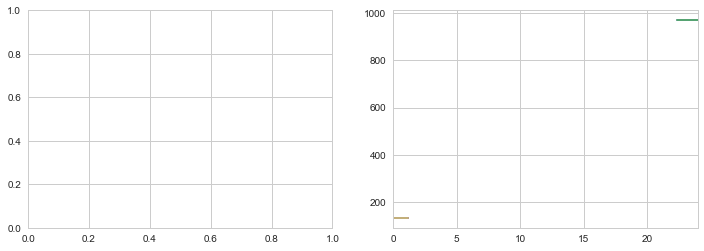

In [289]:
select_student = '4ae518aecc7ea120f1cba21f476a4928'
select_day = ['2017-10-23', '2017-06-01']
f,ax=plt.subplots(1,2,figsize=(12,4))
for i in range(len(select_day)):
    someone = by_student_network_record_data[by_student_network_record_data['id'] == select_student]
    someone_day = someone[someone['day'] == select_day[i]]
    for j in range(someone_day.shape[0]):
        plt.plot([someone_day['logintime_seconds'].iloc[i], someone_day['logintime_seconds'].iloc[i] + someone_day['duration_seconds'].iloc[i]], [someone_day['total_mb'].iloc[i], someone_day['total_mb'].iloc[i]])
        plt.xlim(([0,24]))

In [21]:
select_student = '4ae518aecc7ea120f1cba21f476a4928'
select_day = '2017-10-23'

In [22]:
someone = by_student_network_record_data[by_student_network_record_data['id'] == select_student]

In [23]:
someone.shape

(111, 18)

In [24]:
someone = someone.sort_values(by='logintime')

In [25]:
someone_day = someone[someone['day'] == select_day]

In [26]:
someone_day

,Unnamed: 0,index,Unnamed: 0.1,id,logintime,logouttime,in_mb,out_mb,sex,grade,school,province,day,total_mb,weekday,duration,duration_seconds,logintime_seconds
233480,233480,220345,3303862,4ae518aecc7ea120f1cba21f476a4928,2017-10-23 13:31:22,2017-10-23 18:36:42,969.215,11.83,男,2017,电子工程学院,安徽省,2017-10-23,981.045,0,0 days 05:05:20.000000000,5.088889,13.522778
233481,233481,220344,3303861,4ae518aecc7ea120f1cba21f476a4928,2017-10-23 22:22:16,2017-10-23 23:59:59,955.889,12.74,男,2017,电子工程学院,安徽省,2017-10-23,968.629,0,0 days 02:59:34.000000000,2.992778,22.371111


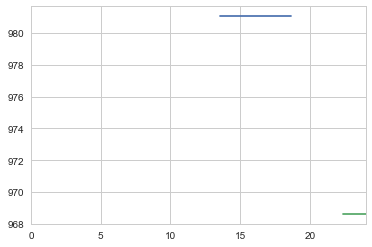

In [251]:
for i in range(someone_day.shape[0]):
    plt.plot([someone_day['logintime_seconds'].iloc[i], someone_day['logintime_seconds'].iloc[i] + someone_day['duration_seconds'].iloc[i]], [someone_day['total_mb'].iloc[i], someone_day['total_mb'].iloc[i]])
    plt.xlim(([0,24]))

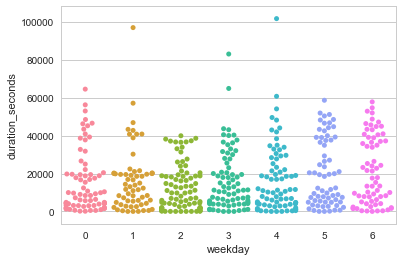

In [12]:
# 每天上网时间统计,按周
sns.swarmplot(x='weekday', y='duration_seconds', data=someone);

In [13]:
someone['total_mb'] = someone['in_mb'] + someone['out_mb']

C:\software\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


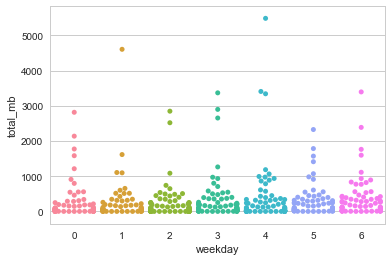

In [14]:
# 每天上网流量统计，按周
sns.swarmplot(x='weekday', y='total_mb', data=someone);

In [18]:
someone['date'] = someone['logintime'].dt.date

C:\software\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
someone.head()

,id,logintime,logouttime,in_mb,out_mb,weekday,duration,duration_seconds
1127214,3878a3ca198ff4e969107bcd01856446,2017-02-26 15:49:12,2017-02-26 17:57:16,5.954,134.195,6,02:08:04,7684.0
1142016,3878a3ca198ff4e969107bcd01856446,2017-02-26 22:38:50,2017-02-26 23:03:39,0.421,0.130,6,00:24:49,1489.0
1162128,3878a3ca198ff4e969107bcd01856446,2017-02-27 17:40:30,2017-02-27 22:52:58,17.376,28.728,0,05:12:28,18748.0
1183894,3878a3ca198ff4e969107bcd01856446,2017-02-28 22:23:28,2017-02-28 22:23:34,0.002,0.003,1,00:00:06,6.0
1183805,3878a3ca198ff4e969107bcd01856446,2017-02-28 22:23:34,2017-02-28 22:59:02,446.376,68.942,1,00:35:28,2128.0


In [29]:
someone_day = someone.groupby('date')['total_mb', 'in_mb', 'out_mb'].sum().reset_index()

KeyError: 'date'

### 起床时间

In [54]:
someone_sort_by_time = someone.sort_values(by='logintime')

In [55]:
someone_sort_by_time['hour'] = someone_sort_by_time['logintime'].dt.hour

In [57]:
someone_sort_by_time['time'] = someone_sort_by_time['logintime'].dt.time

In [68]:
someone_sort_by_time.sort_values(by='time').head()

,id,logintime,logouttime,in_mb,out_mb,hour,time
5896725,3878a3ca198ff4e969107bcd01856446,2017-06-01 00:00:02,2017-06-01 00:00:02,0.000,0.000,0,00:00:02
4576740,3878a3ca198ff4e969107bcd01856446,2017-11-01 00:00:04,2017-11-01 00:00:04,0.000,0.000,0,00:00:04
3263728,3878a3ca198ff4e969107bcd01856446,2017-09-18 00:39:40,2017-09-18 01:29:57,180.748,4.341,0,00:39:40
5003996,3878a3ca198ff4e969107bcd01856446,2017-11-12 01:16:16,2017-11-12 01:22:19,13.713,1.404,1,01:16:16
6511803,3878a3ca198ff4e969107bcd01856446,2017-07-09 01:38:07,2017-07-09 12:29:27,348.750,19.094,1,01:38:07


In [96]:
someone_sort_by_time = someone_sort_by_time[someone_sort_by_time['hour'] < 12]
someone_sort_by_time = someone_sort_by_time[someone_sort_by_time['hour'] > 4]

## 处理课表数据

In [33]:
by_course_schedule_info_data_new = pd.DataFrame(by_course_schedule_info_data['id'].unique(), columns=['id'])

In [34]:
by_course_schedule_info_data_new.shape

(14820, 1)